In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [197]:
df_origin = pd.read_csv('./visualization/dataset/titanic3.csv')
df = df_origin.copy()
df1 = df.copy() # 수정한 데이터 적용할곳
df.head()
# pclass 티켓등급
# survived 생존여부
# name 이름
# sex 성별
# sibsp 탑승한 형제, 배우자의 수
# parch 탑승한 부모, 자녀의 수
# ticket 티켓 번호
# fare 요금
# cabin 객실 번호
# embarked 기항지 위치
# boat 탈출한 보트가 있다면 boat 번호
# body 사망자 확인 번호
# home.dest 고향/목적지

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [199]:
print(df['home.dest'].value_counts(),'\n')
print(df.loc[df['home.dest']=='New York, NY'].mean())
# 절반도 겹치지 않으나 가장많은 값인 교향이 뉴욕인 사람의 생존률이 62퍼센트이므로 뉴욕만 보존하기로 결정
df1['home.dest'] = np.where(df1['home.dest']=='New York, NY',1,0)  # 뉴욕만 1로 바꿔줌
df1['home.dest'].value_counts()

New York, NY                                    64
London                                          14
Montreal, PQ                                    10
Paris, France                                    9
Cornwall / Akron, OH                             9
                                                ..
Chelsea, London                                  1
Harrow-on-the-Hill, Middlesex                    1
Copenhagen, Denmark                              1
Guernsey / Montclair, NJ and/or Toledo, Ohio     1
Antwerp, Belgium / Stanton, OH                   1
Name: home.dest, Length: 369, dtype: int64 

pclass       1.187500
survived     0.625000
age         38.063636
sibsp        0.500000
parch        0.187500
fare        62.976041
body        63.400000
dtype: float64


0    1245
1      64
Name: home.dest, dtype: int64

In [200]:
# body는 사망자 확인번호이므로 body가 존재한다면 무조건 사망자
print(df.body.sort_values())
# 1부터 있으므로 NaN값을 0으로 만들고 0 이상을 1로 바꾸기
df1.body.replace(np.nan,0, inplace = True)
df1.body.loc[df.body>0] =1
df1.body.value_counts()

1263     1.0
1096     4.0
1153     7.0
741      9.0
1294    14.0
        ... 
1302     NaN
1303     NaN
1305     NaN
1307     NaN
1308     NaN
Name: body, Length: 1309, dtype: float64


0.0    1188
1.0     121
Name: body, dtype: int64

In [201]:
df_em = df[['embarked','survived']].groupby('embarked')
print(df_em.mean())
# embarked 가 C 인경우 생존률이 높으므로 유의미한 데이터라고 판단

          survived
embarked          
C         0.555556
Q         0.357724
S         0.332604


In [202]:
print(df1.embarked.isnull().sum())
print(df1.embarked.value_counts())
# 최빈값인 S로 채워넣기로 결정
df1.embarked.fillna('S',inplace = True)

2
S    914
C    270
Q    123
Name: embarked, dtype: int64


In [203]:
df1.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        0
boat          823
body            0
home.dest       0
dtype: int64

In [204]:
df2 = pd.get_dummies(df1.embarked) # 원핫인코딩으로 분류
df1 = df1.join(df2)
df1.drop('embarked',axis = 1 , inplace = True) # embarked 열 삭제
df1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,boat,body,home.dest,C,Q,S
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,2,0.0,0,0,0,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,11,0.0,0,0,0,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,NaN,0.0,0,0,0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,NaN,1.0,0,0,0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,NaN,0.0,0,0,0,1


In [205]:
# boat는 보트를 탑승했다는 뜻이므로 보트에 탔다면 생존률이 높을것이라 예상
# boat에 값이 있다면 1 없다면 0으로 
print(df.boat.value_counts().sum())
df1.boat.fillna(0,inplace = True)
df1.boat=np.where(df1.boat==0,0,1)
df1.boat.value_counts()

486


0    823
1    486
Name: boat, dtype: int64

In [206]:
# boat를 그룹으로 묶어서 확인해본 결과 생존률이 98%로 매우 높은것을 확인
df_boat= df1.groupby('boat')
df_boat.mean()

,pclass,survived,age,sibsp,parch,fare,body,home.dest,C,Q,S
boat,,,,,,,,,,,
0,2.503038,0.027947,30.504897,0.520049,0.325638,23.241605,0.147023,0.030377,0.147023,0.103281,0.749696
1,1.942387,0.981481,28.940264,0.462963,0.485597,50.300180,0.000000,0.080247,0.306584,0.078189,0.615226


In [207]:
print(df.cabin.value_counts())
# cabin의 경우 겹치는것도 많이 없고 양 자체가 적으므로 삭제
df1.drop('cabin',axis=1,inplace = True)
df1.head()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F4                 4
F33                4
                  ..
C132               1
E60                1
B52 B54 B56        1
C49                1
F38                1
Name: cabin, Length: 186, dtype: int64


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,boat,body,home.dest,C,Q,S
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,1,0.0,0,0,0,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,1,0.0,0,0,0,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,0,0.0,0,0,0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,0,1.0,0,0,0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,0,0.0,0,0,0,1


In [208]:
df1['fare_person']=np.arange(len(df1))
df1.loc[(df1.sibsp==0)&(df1.parch==0),'fare_person']=df1.fare
df1.loc[(df1.sibsp!=0)|(df1.parch!=0),'fare_person']=df1.fare/(df1.sibsp+df1.parch+1)

In [209]:
df1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,boat,body,home.dest,C,Q,S,fare_person
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,1,0.0,0,0,0,1,211.3375
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,1,0.0,0,0,0,1,37.8875
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,0,0.0,0,0,0,1,37.8875
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,0,1.0,0,0,0,1,37.8875
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,0,0.0,0,0,0,1,37.8875


In [210]:
print(df1.fare.value_counts(),'\n')
# 너무 광범위 하므로 범주를 설정
print(df1.fare.isnull().sum(),'\n') # NaN 값이 존재하므로 처리 필요
print(df.loc[df.fare.isnull()]) # fare 값은 결국 pclass와 관련이 있다고 생각

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
15.0500     1
9.6875      1
15.5792     1
12.0000     1
7.8750      1
Name: fare, Length: 281, dtype: int64 

1 

      pclass  survived                name   sex   age  sibsp  parch ticket  \
1225       3         0  Storey, Mr. Thomas  male  60.5      0      0   3701   

      fare cabin embarked boat   body home.dest  
1225   NaN   NaN        S  NaN  261.0       NaN  


In [211]:
# 확인해보니 등급별로 fare차이가 있으므로 NaN값을 pclass 3의 fare평균값으로 대체하기로 결정
print(df1.loc[df1.pclass == 1,'fare_person'].mean(),'\n')
print(df1.loc[df1.pclass == 2,'fare_person'].mean(),'\n')
print(df1.loc[df1.pclass == 3,'fare_person'].mean(),'\n')
df1.fare_person.replace(np.nan , df1.loc[df.pclass==3,'fare_person'].mean() , inplace = True)
df1.fare_person.isnull().sum()

54.174415170278614 

13.352015042117921 

7.967487486548307 



0

In [212]:
df1.loc[:,['fare_person','pclass']].groupby('pclass').describe()
# pclass 2,3 의 최대값이 73이므로 73이상을 범주로 묶고 그 아래를 나누기로 결정

fare_person                                                           
             count       mean        std  min    25%    50%     75%       max
pclass                                                                       
1            323.0  54.174415  59.318084  0.0  26.55  33.30  52.475  512.3292
2            277.0  13.352015   9.294137  0.0  10.50  13.00  13.000   73.5000
3            709.0   7.967487   5.850816  0.0   6.75   7.75   7.925   56.4958

In [213]:
df1.loc[(df1.fare_person > 30)&(df1.pclass==2)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,boat,body,home.dest,C,Q,S,fare_person
386,2,0,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.50,0,0.0,0,0,0,1,73.50
390,2,0,"Deacon, Mr. Percy William",male,17.0,0,0,S.O.C. 14879,73.50,0,0.0,0,0,0,1,73.50
393,2,0,"Denbury, Mr. Herbert",male,25.0,0,0,C.A. 31029,31.50,0,0.0,0,0,0,1,31.50
394,2,0,"Dibden, Mr. William",male,18.0,0,0,S.O.C. 14879,73.50,0,0.0,0,0,0,1,73.50
453,2,0,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.50,0,0.0,0,0,0,1,73.50
483,2,1,"Leitch, Miss. Jessie Wills",female,NaN,0,0,248727,33.00,1,0.0,0,0,0,1,33.00
559,2,1,"Sincock, Miss. Maude",female,20.0,0,0,C.A. 33112,36.75,1,0.0,0,0,0,1,36.75
569,2,0,"Sweet, Mr. George Frederick",male,14.0,0,0,220845,65.00,0,0.0,0,0,0,1,65.00


In [214]:
fare_name = ['0','5','10','15','20','25','30','35','40','45','50','55','60','65','70','75']
fare_div = [0 , 5, 10,15, 20,25, 30,35, 40,45,50,55, 60, 65,70, 75 , 512.3292]
df1['fare_cut'] = pd.cut(x = df1['fare_person'], #데이터 배열
                               bins = fare_div,    #경계값 리스트
                               labels = fare_name,     #구간명
                               include_lowest = True)  # 첫 경계값 포함여부(구간의 하위값)

In [215]:
df1.groupby('fare_cut').describe()
#괜찮다고 판단하여 이대로 해보기로 결정

pclass                                              survived  \
          count      mean       std  min  25%  50%  75%  max    count   
fare_cut                                                                
0         118.0  2.754237  0.568946  1.0  3.0  3.0  3.0  3.0    118.0   
5         624.0  2.921474  0.286542  1.0  3.0  3.0  3.0  3.0    624.0   
10        194.0  2.046392  0.274876  1.0  2.0  2.0  2.0  3.0    194.0   
15         34.0  2.000000  0.696311  1.0  2.0  2.0  2.0  3.0     34.0   
20         15.0  2.200000  0.676123  1.0  2.0  2.0  3.0  3.0     15.0   
25        121.0  1.066116  0.249517  1.0  1.0  1.0  1.0  2.0    121.0   
30         32.0  1.062500  0.245935  1.0  1.0  1.0  1.0  2.0     32.0   
35         31.0  1.096774  0.396219  1.0  1.0  1.0  1.0  3.0     31.0   
40         28.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0     28.0   
45          9.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0      9.0   
50         18.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0     18.0   
55         11.0  2.454545  0.934199  1.0  2.0  3.0  3.0  3.0     11.0   
60          1.0  2.000000       NaN  2.0  2.0  2.0  2.0  2.0      1.0   
65          5.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0      5.0   
70          9.0  1.444444  0.527046  1.0  1.0  1.0  2.0  2.0      9.0   
75         59.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0     59.0   

                    ...    S      fare_person                         \
              mean  ...  75%  max       count        mean        std   
fare_cut            ...                                                
0         0.254237  ...  1.0  1.0       118.0    3.469656   1.633809   
5         0.291667  ...  1.0  1.0       624.0    7.620291   0.953401   
10        0.371134  ...  1.0  1.0       194.0   12.310513   1.235885   
15        0.529412  ...  1.0  1.0        34.0   16.423568   1.440022   
20        0.266667  ...  1.0  1.0        15.0   22.780556   1.469656   
25        0.595041  ...  1.0  1.0       121.0   27.362688   1.393266   
30        0.468750  ...  1.0  1.0        32.0   31.611717   1.313124   
35        0.548387  ...  1.0  1.0        31.0   37.804972   1.390387   
40        0.714286  ...  1.0  1.0        28.0   43.201786   1.576349   
45        0.333333  ...  1.0  1.0         9.0   47.754178   1.998703   
50        0.444444  ...  1.0  1.0        18.0   52.849072   1.411424   
55        0.818182  ...  1.0  1.0        11.0   56.560964   0.134642   
60        0.000000  ...  1.0  1.0         1.0   65.000000        NaN   
65        0.800000  ...  0.0  1.0         5.0   68.440840   1.011497   
70        0.222222  ...  1.0  1.0         9.0   72.446756   1.463340   
75        0.745763  ...  1.0  1.0        59.0  146.210712  90.626459   

                                                                    
                min        25%         50%         75%         max  
fare_cut                                                            
0          0.000000   2.878125    4.208550    4.650000    5.000000  
5          5.081933   7.227100    7.775000    8.050000   10.000000  
10        10.170800  10.504175   13.000000   13.000000   15.000000  
15        15.033300  15.200000   16.100000   16.994800   19.800000  
20        21.000000  21.000000   22.525000   24.150000   24.500000  
25        25.587500  26.287500   26.550000   28.464600   30.000000  
30        30.500000  30.664075   31.000000   31.842675   35.000000  
35        35.500000  36.961100   37.887500   38.979150   39.687500  
40        40.125000  41.697913   43.833333   44.622408   45.000000  
45        45.500000  45.539600   47.100000   49.504200   50.000000  
50        50.495800  52.000000   52.475000   54.140625   54.955567  
55        56.495800  56.495800   56.495800   56.566650   56.929200  
60        65.000000  65.000000   65.000000   65.000000   65.000000  
65        66.825000  68.389600   68.389600   69.300000   69.300000  
70        70.500000  70.500000   73.260400   73.500000   73.500000  
75        

In [216]:
df1.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,boat,body,home.dest,C,Q,S,fare_person,fare_cut
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,1,0.0,0,0,0,1,211.3375,75
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,1,0.0,0,0,0,1,37.8875,35
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,0,0.0,0,0,0,1,37.8875,35
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,0,1.0,0,0,0,1,37.8875,35
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,0,0.0,0,0,0,1,37.8875,35


In [217]:
# fare와 fare_person 행 삭제
df1.drop(['fare','fare_person'],axis = 1, inplace = True)

In [218]:
df1.ticket.value_counts()

CA. 2343    11
1601         8
CA 2144      8
PC 17608     7
347077       7
            ..
373450       1
2223         1
350046       1
3101281      1
315082       1
Name: ticket, Length: 929, dtype: int64

In [219]:
# ticket은 겹치는것이 많이없고 나누기 애매하므로 삭제
df1.drop('ticket',axis = 1,inplace=True)
df1.head()

,pclass,survived,name,sex,age,sibsp,parch,boat,body,home.dest,C,Q,S,fare_cut
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,1,0.0,0,0,0,1,75
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,1,0.0,0,0,0,1,35
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,0,0.0,0,0,0,1,35
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,0,1.0,0,0,0,1,35
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,0,0.0,0,0,0,1,35


In [220]:
# 성별은 라벨인코더를 사용하여 1과 0으로 변환
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1.sex = le.fit_transform(df1.sex)
df1.head()

,pclass,survived,name,sex,age,sibsp,parch,boat,body,home.dest,C,Q,S,fare_cut
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.00,0,0,1,0.0,0,0,0,1,75
1,1,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,1,0.0,0,0,0,1,35
2,1,0,"Allison, Miss. Helen Loraine",0,2.00,1,2,0,0.0,0,0,0,1,35
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.00,1,2,0,1.0,0,0,0,1,35
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,1,2,0,0.0,0,0,0,1,35


In [221]:
# 이름은 가운데 호칭만 활용하기로 결정
# 인덱싱을 활용하여 그곳에 가운데 문자열만 넣어줌
for i in range(len(df1)):
    df1['name'][i]=df1.name[i].split(',')[1].split('.')[0].strip()
df1.head()

,pclass,survived,name,sex,age,sibsp,parch,boat,body,home.dest,C,Q,S,fare_cut
0,1,1,Miss,0,29.00,0,0,1,0.0,0,0,0,1,75
1,1,1,Master,1,0.92,1,2,1,0.0,0,0,0,1,35
2,1,0,Miss,0,2.00,1,2,0,0.0,0,0,0,1,35
3,1,0,Mr,1,30.00,1,2,0,1.0,0,0,0,1,35
4,1,0,Mrs,0,25.00,1,2,0,0.0,0,0,0,1,35


In [222]:
# age의 null 값은 그 호칭의 평균 나이로 넣기로 결정

In [223]:
# 각 호칭별 평균값으로 null 값 대입
df1.loc[(df1.age.isnull())&(df1.name == 'Mr'),'age']= df1.loc[df1.name == 'Mr','age'].mean()
df1.loc[(df1.age.isnull())&(df1.name == 'Miss'),'age']= df1.loc[df1.name == 'Miss','age'].mean()
df1.loc[(df1.age.isnull())&(df1.name == 'Mrs'),'age']= df1.loc[df1.name == 'Mrs','age'].mean()
df1.loc[(df1.age.isnull())&(df1.name == 'Master'),'age']= df1.loc[df1.name == 'Master','age'].mean()
df1.loc[(df1.age.isnull())&(df1.name == 'Dr'),'age']= df1.loc[df1.name == 'Dr','age'].mean()
df1.loc[(df1.age.isnull())&(df1.name == 'Ms'),'age']= df1.loc[df1.name == 'Ms','age'].mean()

In [224]:
df1.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
boat         0
body         0
home.dest    0
C            0
Q            0
S            0
fare_cut     0
dtype: int64

In [225]:
df2 = df1.loc[:,['name','survived','age','pclass','sex']]
df_gn = df2.groupby('name')

In [226]:
df_gn.describe().loc[:,['survived']]

survived                                               
                count      mean       std  min   25%  50%   75%  max
name                                                                
Capt              1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
Col               4.0  0.500000  0.577350  0.0  0.00  0.5  1.00  1.0
Don               1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
Dona              1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0
Dr                8.0  0.500000  0.534522  0.0  0.00  0.5  1.00  1.0
Jonkheer          1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
Lady              1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0
Major             2.0  0.500000  0.707107  0.0  0.25  0.5  0.75  1.0
Master           61.0  0.508197  0.504082  0.0  0.00  1.0  1.00  1.0
Miss            260.0  0.676923  0.468554  0.0  0.00  1.0  1.00  1.0
Mlle              2.0  1.000000  0.000000  1.0  1.00  1.0  1.00  1.0
Mme               1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0
Mr              757.0  0.162483  0.369138  0.0  0.00  0.0  0.00  1.0
Mrs             197.0  0.786802  0.410610  0.0  1.00  1.0  1.00  1.0
Ms                2.0  0.500000  0.707107  0.0  0.25  0.5  0.75  1.0
Rev               8.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0
Sir               1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0
the Countess      1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0

In [227]:
# 관측치가 높은 MIss,Mr,Master,Mrs 만 남기고 나머지는 하나로 통합
def name_cat(name):
    cat = ''
    if name == 'Miss': cat = 'Miss'
    elif name == 'Mr': cat = 'Mr'
    elif name == 'Master': cat = 'Master'
    elif name == 'Mrs': cat = 'Mrs'
    else: cat = 'others'
    return cat
df1['name'] = df1.name.apply(name_cat)

In [228]:
df1.name.value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
others     34
Name: name, dtype: int64

In [229]:
# name 항목을 원핫 인코딩으로 나눠서 분류
df2 = pd.get_dummies(df1.name) # 원핫인코딩으로 분류
df1 = df1.join(df2)
df1.drop('name',axis = 1 , inplace = True) # embarked 열 삭제
df1.head()

,pclass,survived,sex,age,sibsp,parch,boat,body,home.dest,C,Q,S,fare_cut,Master,Miss,Mr,Mrs,others
0,1,1,0,29.00,0,0,1,0.0,0,0,0,1,75,0,1,0,0,0
1,1,1,1,0.92,1,2,1,0.0,0,0,0,1,35,1,0,0,0,0
2,1,0,0,2.00,1,2,0,0.0,0,0,0,1,35,0,1,0,0,0
3,1,0,1,30.00,1,2,0,1.0,0,0,0,1,35,0,0,1,0,0
4,1,0,0,25.00,1,2,0,0.0,0,0,0,1,35,0,0,0,1,0


In [231]:
# age 범주화
count , div = np.histogram(df1.age)
age_list = ['0','8','16','24','32','40','48','56','64','72']
df1.age =pd.cut(df1.age,
      bins = div,
      labels = age_list,
    include_lowest = True)

<AxesSubplot:xlabel='fare_cut', ylabel='pclass'>

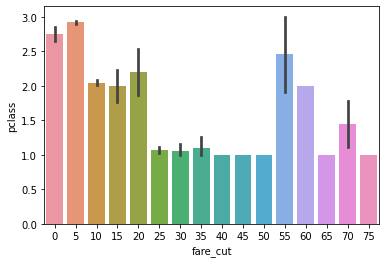

In [232]:
sns.barplot(x='fare_cut',y='pclass',data=df1)

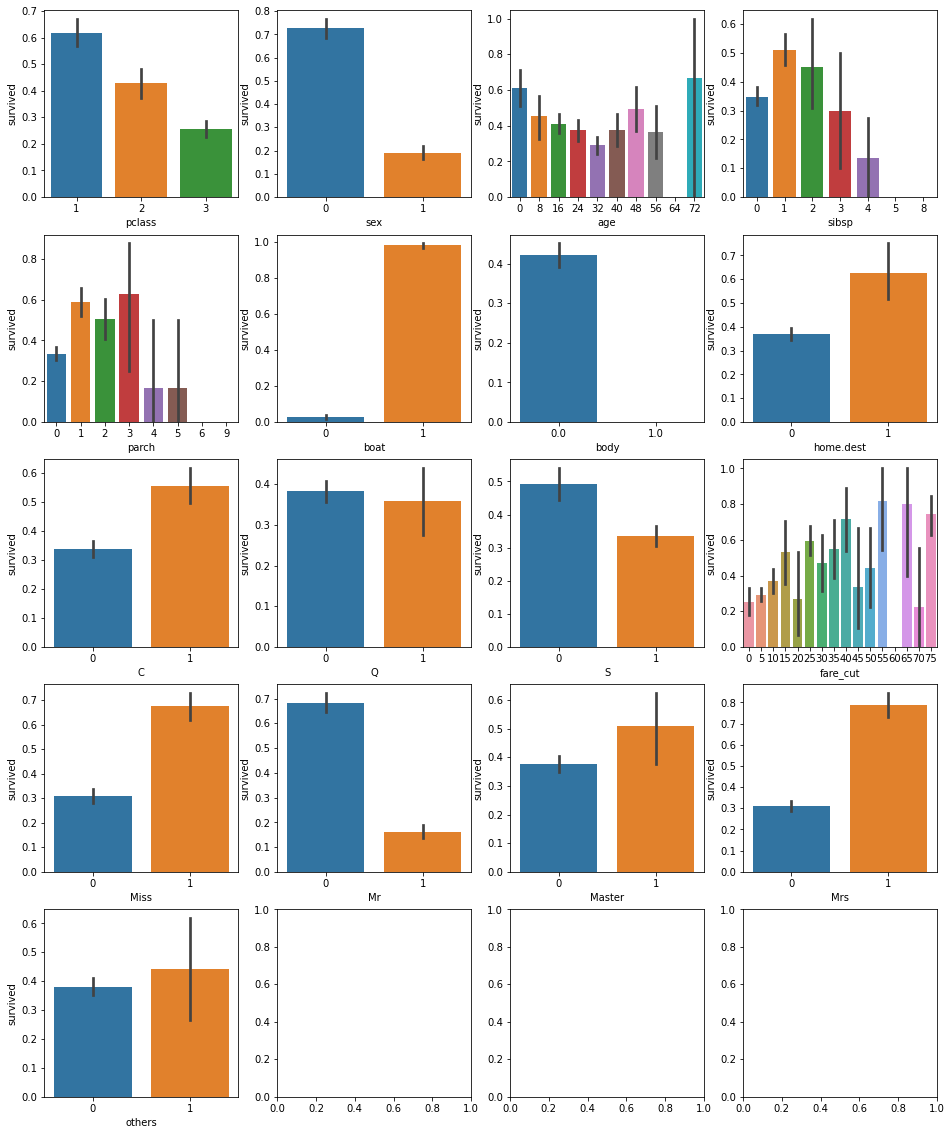

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(ncols=4, nrows=5, figsize=(16,20))
lm_features = ['pclass','sex','age','sibsp','parch','boat','body','home.dest','C','Q','S','fare_cut','Miss','Mr','Master','Mrs','others']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.barplot(x=feature , y='survived',data=df1 , ax=axs[row][col])

In [159]:
# boat를 제거하고 해보기
df2 = df1.copy()
df2.drop(['boat'],axis = 1 , inplace = True)

In [160]:
df2.fare_cut=df2.fare_cut.astype(int)

In [146]:
df2.corr()

,pclass,survived,sibsp,parch,body,home.dest,C,Q,S,fare_cut,Master,Miss,Mr,Mrs,others
pclass,1.000000,-0.312469,0.060832,0.018322,-0.049382,-0.299785,-0.269658,0.230491,0.096335,-0.724749,0.095257,0.030478,0.121492,-0.178808,-0.177925
survived,-0.312469,1.000000,-0.027825,0.082660,-0.250897,0.113408,0.182123,-0.016071,-0.154558,0.250727,0.057436,0.302225,-0.529016,0.350699,0.019899
sibsp,0.060832,-0.027825,1.000000,0.373587,-0.046510,0.000250,-0.048396,-0.048678,0.075198,-0.100159,0.329171,0.079622,-0.243104,0.065098,-0.027496
parch,0.018322,0.082660,0.373587,1.000000,-0.038374,-0.051761,-0.008635,-0.100943,0.073258,-0.077718,0.253482,0.068368,-0.304780,0.217673,-0.050464
body,-0.049382,-0.250897,-0.046510,-0.038374,1.000000,-0.011203,0.000274,-0.039500,0.025930,0.029432,-0.033018,-0.139052,0.192410,-0.097445,0.014213
home.dest,-0.299785,0.113408,0.000250,-0.051761,-0.011203,1.000000,0.173349,-0.048733,-0.121073,0.203805,-0.050126,-0.041840,-0.043125,0.122542,0.029793
C,-0.269658,0.182123,-0.048396,-0.008635,0.000274,0.173349,1.000000,-0.164166,-0.775441,0.324666,-0.014172,-0.021905,-0.065538,0.096979,0.059196
Q,0.230491,-0.016071,-0.048678,-0.100943,-0.039500,-0.048733,-0.164166,1.000000,-0.489874,-0.154579,-0.009091,0.200610,-0.080224,-0.106257,-0.003207
S,0.096335,-0.154558,0.075198,0.073258,0.025930,-0.121073,-0.775441,-0.489874,1.000000,-0.198791,0.019007,-0.110725,0.112665,-0.021196,-0.049599
fare_cut,-0.724749,0.250727,-0.100159,-0.077718,0.029432,0.203805,0.324666,-0.154579,-0.198791,1.000000,-0.107990,0.054476,-0.096452,0.087913,0.108296


In [144]:
df2.fare_cut.unique()

['75', '35', '25', '0', '15', ..., '10', '40', '55', '70', '60']
Length: 16
Categories (16, object): ['0' < '5' < '10' < '15' ... '60' < '65' < '70' < '75']

In [46]:
df2['fare_cut']=le.fit_transform(df1.fare_cut)

In [47]:
count , div = np.histogram(df1.age)
age_list = ['0','8','16','24','32','40','48','56','64','72']
df1.age =pd.cut(df1.age,
      bins = div,
      labels = age_list,
    include_lowest = True)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [342]:
df2.drop('body',axis = 1, inplace = True)

In [470]:
df2.drop('name',axis = 1, inplace = True)

In [286]:
df2['family']=df2.sibsp+df2.parch
df2.drop(['sibsp','parch'],axis = 1, inplace = True)

In [196]:
df2.head()

,C,Q,S
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [321]:
df3 = pd.get_dummies(df2)

In [478]:
df = pd.read_pickle('./visualization/dataset/tdf.pkl')
df.head()

,survived,fare_cat,age_cat,family,female,male,town_C,town_Q,town_S
0,1,1,0,0,1,0,0,0,1
1,1,1,4,3,0,1,0,0,1
2,0,1,4,3,1,0,0,0,1
3,0,1,0,3,0,1,0,0,1
4,0,1,0,3,1,0,0,0,1


In [161]:
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
y_df = df2['survived'] # 종속변수
X_df = df2.drop('survived',axis=1) # 독립변수

# 학습용 데이터와 평가용 데이터를 8:2 혹은 7:3으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_df,y_df, test_size = 0.2, random_state=11) # 8:2로 , 랜덤고정

print(X_train.shape)
print(X_test.shape)

(1047, 16)
(262, 16)


In [162]:
# 모델 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test,rf_pred).round(2)

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test,lr_pred).round(2)

print(f'rf 정확도 : {accuracy_rf}, lr 정확도 : {accuracy_lr}')

rf 정확도 : 0.81, lr 정확도 : 0.85
